In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [5]:
dt = pd.read_csv('Diwali Sales Data.csv', encoding='ISO-8859-1')

In [6]:
dt.head()


,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [8]:
dt.isnull().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

### Drop the column 'Status' and 'unnamed1'

In [9]:
dt= dt.drop(columns= ['Status','unnamed1'])

### In the Amount column, 12 missing values replaced by median

In [10]:
dt['Amount'] = dt['Amount'].fillna(value = dt['Amount'].median())

In [11]:
dt

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,1000695,Manning,P00296942,M,18-25,19,1,Maharashtra,Western,Chemical,Office,4,370.0
11247,1004089,Reichenbach,P00171342,M,26-35,33,0,Haryana,Northern,Healthcare,Veterinary,3,367.0
11248,1001209,Oshin,P00201342,F,36-45,40,0,Madhya Pradesh,Central,Textile,Office,4,213.0
11249,1004023,Noonan,P00059442,M,36-45,37,0,Karnataka,Southern,Agriculture,Office,3,206.0


## Analysis

### 1. Total sales amount

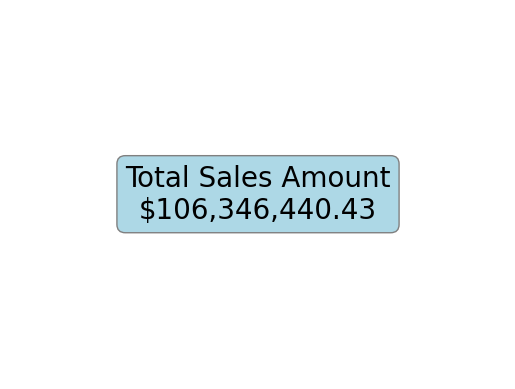

In [12]:
total_amount = dt['Amount'].sum()

fig, ax = plt.subplots()
ax.axis('off')  # Hide axis lines and ticks

ax.text(
    0.5, 0.5,                           # Position in the middle of the plot
    f'Total Sales Amount\n${total_amount:,.2f}',  # Text with formatting
    fontsize=20,                        # Font size
    ha='center', va='center',          # Center alignment
    bbox=dict(                         # Bounding box around text
        boxstyle='round',
        facecolor='lightblue',
        edgecolor='gray',              # border color
        linewidth=1                    # border width
    )
)

plt.show()
    

### 2. Total Number of Order

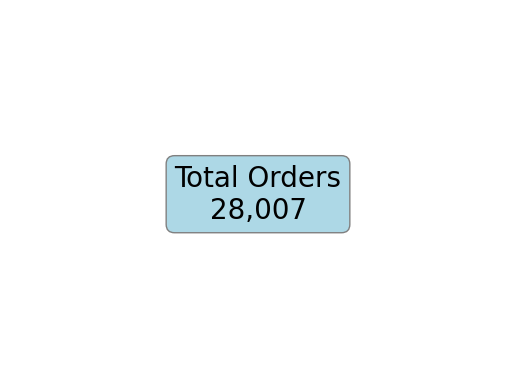

In [13]:
total_order = dt['Orders'].sum()
total_amount = dt['Amount'].sum()

fig, ax = plt.subplots()
ax.axis('off') 

ax.text(
    0.5, 0.5,                           
    f'Total Orders\n{total_order:,}', 
    fontsize=20,                       
    ha='center', va='center',          
    bbox=dict(                        
        boxstyle='round',
        facecolor='lightblue',
        edgecolor='gray',              
        linewidth=1                    
    )
)

plt.show()

### 3. Average order value

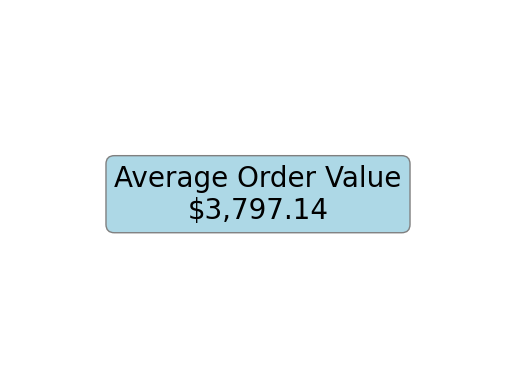

In [14]:
average_order_value = dt['Amount'].sum() / dt['Orders'].sum()
fig, ax = plt.subplots()
ax.axis('off') 
ax.text(
    0.5, 0.5,                           
    f'Average Order Value\n${average_order_value:,.2f}', 
    fontsize=20,                       
    ha='center', va='center',          
    bbox=dict(                        
        boxstyle='round',
        facecolor='lightblue',
        edgecolor='gray',              
        linewidth=1                    
    )
)

plt.show()


### 4. Total Customer

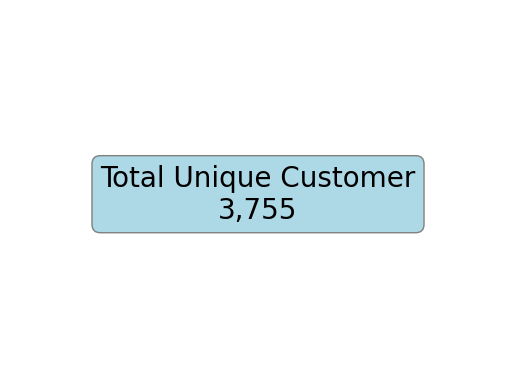

In [15]:

Total_Unique_Customer = dt['User_ID'].nunique()
fig, ax = plt.subplots()
ax.axis('off') 
ax.text(
    0.5, 0.5,                           
    f'Total Unique Customer\n{Total_Unique_Customer:,}', 
    fontsize=20,                       
    ha='center', va='center',          
    bbox=dict(                        
        boxstyle='round',
        facecolor='lightblue',
        edgecolor='gray',              
        linewidth=1                    
    )
)

plt.show()

### 5. Sales by gender

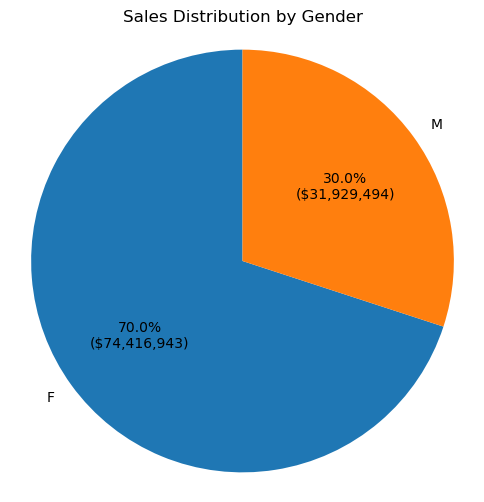

In [16]:
gender_sales = dt.groupby('Gender')['Amount'].sum()
plt.figure(figsize=(6, 6))
plt.pie(
    gender_sales,
    labels=gender_sales.index,
    startangle=90,
    autopct=lambda pct: f'{pct:.1f}%\n(${pct * gender_sales.sum() / 100:,.0f})'
)

plt.title('Sales Distribution by Gender')
plt.axis('equal')
plt.show()


### 6. Sales by age group

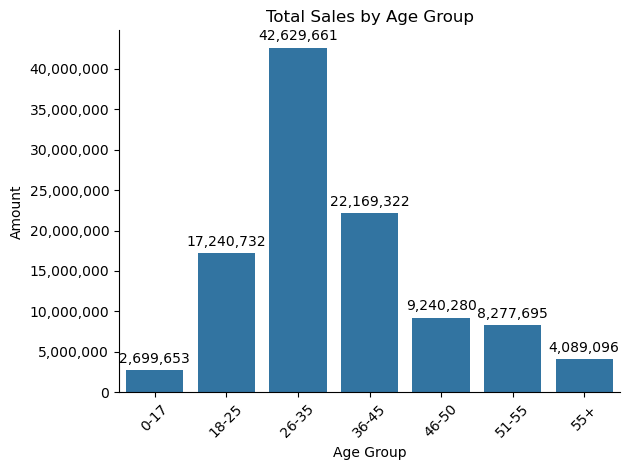

In [61]:
import matplotlib.ticker as mtick

age_sales = dt.groupby('Age Group')['Amount'].sum().reset_index()

ax = sns.barplot(data=age_sales, x='Age Group', y='Amount')

ax.yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.xticks(rotation=45)

for container in ax.containers:
    ax.bar_label(container, labels=[f'{int(v.get_height()):,}' for v in container], padding=3)

plt.title('Total Sales by Age Group')
plt.tight_layout()
sns.despine(top=True, right=True) 
plt.show()



### 7. Sales by marital status

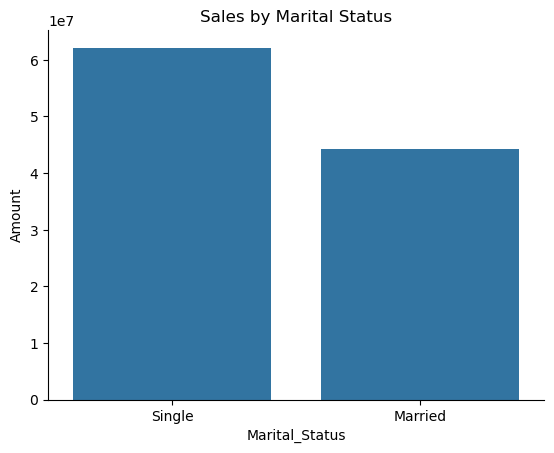

In [62]:
sns.barplot(data=dt.groupby('Marital_Status')['Amount'].sum().reset_index(), 
            x='Marital_Status', y='Amount')
plt.title('Sales by Marital Status')
plt.xticks([0, 1], ['Single', 'Married'])
sns.despine(top=True, right=True) 
plt.show()


### 8. Sales by age group and gender

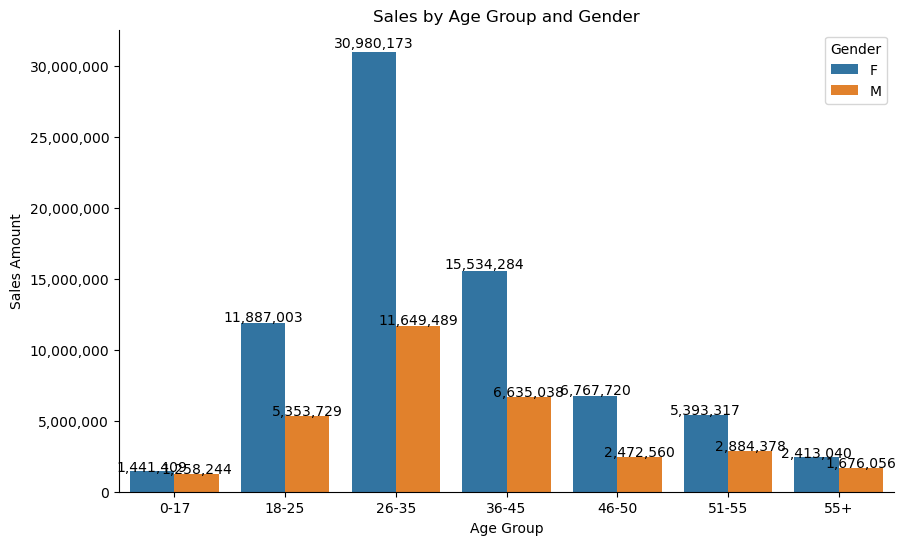

In [63]:

def add_values_on_bars(ax, fmt='{:,.0f}'):
    for p in ax.patches:
        if p.get_width() > p.get_height():
            width = p.get_width()
            if width > 0:
                ax.text(p.get_x() + width + 0.01 * width, p.get_y() + p.get_height()/2,
                        fmt.format(width), va='center')
        else:
            height = p.get_height()
            if height > 0:
                ax.text(p.get_x() + p.get_width()/2, height + 0.01 * height,
                        fmt.format(height), ha='center')

combo = dt.groupby(['Age Group', 'Gender'])['Amount'].sum().reset_index()

plt.figure(figsize=(10,6))
ax = sns.barplot(data=combo, x='Age Group', y='Amount', hue='Gender',
                 order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'])
plt.title('Sales by Age Group and Gender')
plt.ylabel('Sales Amount')

# Turn off scientific notation on y-axis and format with commas
ax.get_yaxis().set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
add_values_on_bars(ax)
sns.despine(top=True, right=True) 
plt.show()


### 9. Zone sale data

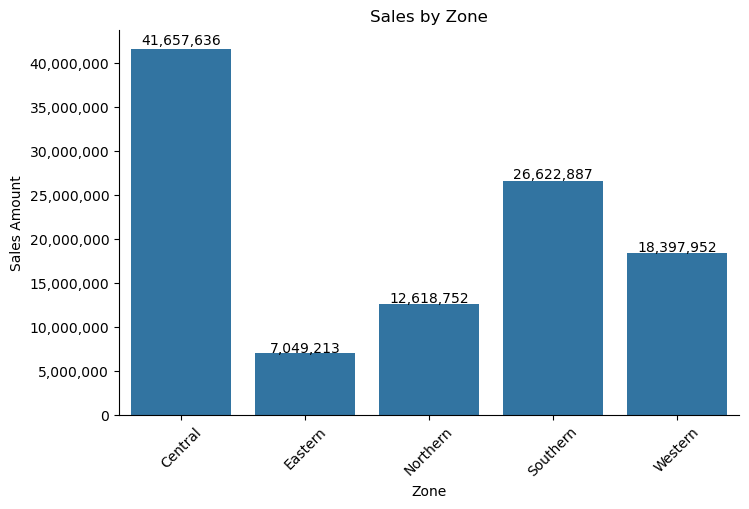

In [64]:
zone_sales = dt.groupby('Zone')['Amount'].sum().reset_index()
plt.figure(figsize=(8,5))
ax = sns.barplot(data=zone_sales, x='Zone', y='Amount')
plt.title('Sales by Zone')
plt.xticks(rotation=45)
plt.ylabel('Sales Amount')
add_values_on_bars(ax)
ax.get_yaxis().set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
sns.despine(top=True, right=True) 
plt.show()



### 10. Sales by occupation

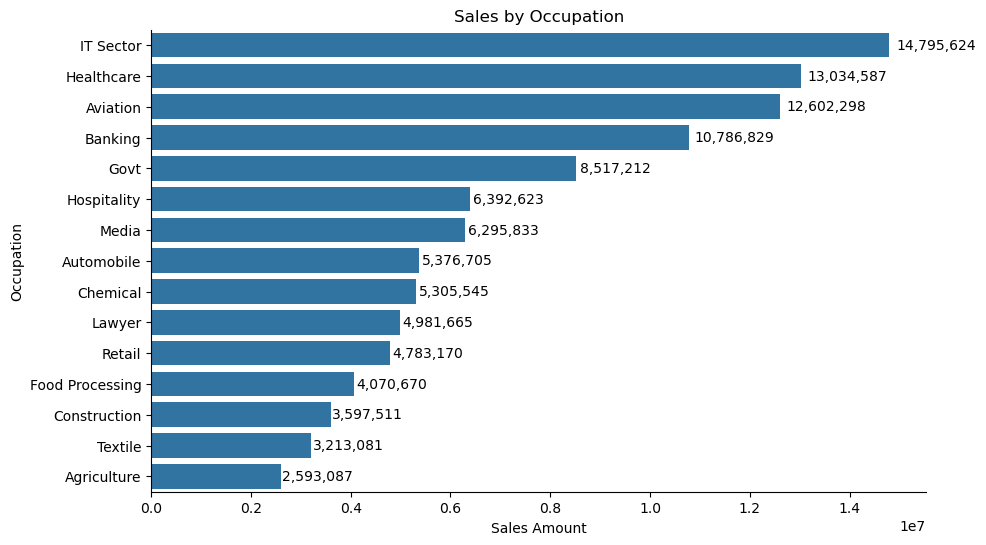

In [65]:
occupation_sales = dt.groupby('Occupation')['Amount'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
ax = sns.barplot(data=occupation_sales, x='Amount', y='Occupation')
plt.title('Sales by Occupation')
plt.xlabel('Sales Amount')
add_values_on_bars(ax)
sns.despine(top=True, right=True) 
plt.show()

### 11. Top Product Categories by Sales

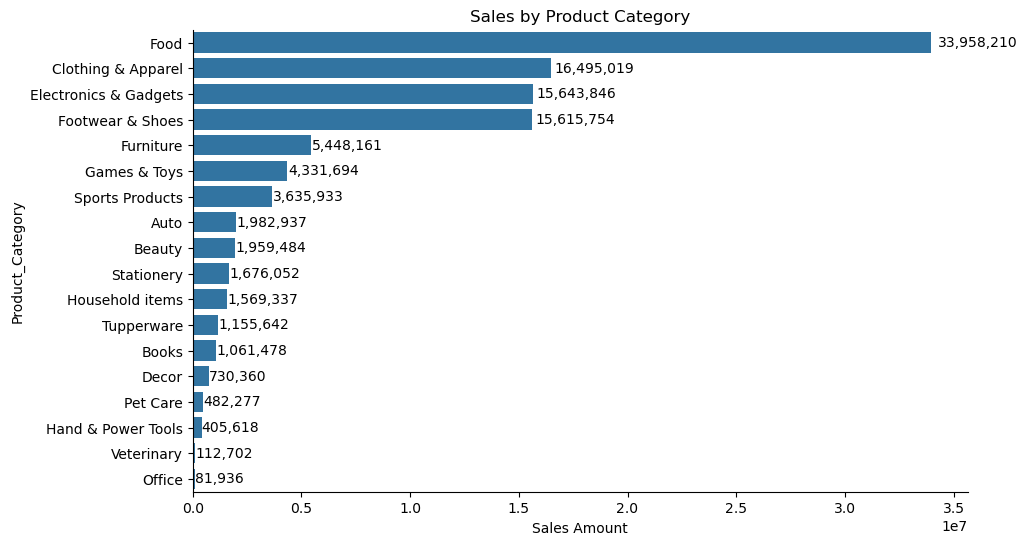

In [66]:
product_sales = dt.groupby('Product_Category')['Amount'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
ax = sns.barplot(data=product_sales, x='Amount', y='Product_Category')
sns.despine(top=True, right=True) 
plt.title('Sales by Product Category')
plt.xlabel('Sales Amount')
add_values_on_bars(ax)
plt.show()

### 12. Most Ordered Product Categories 

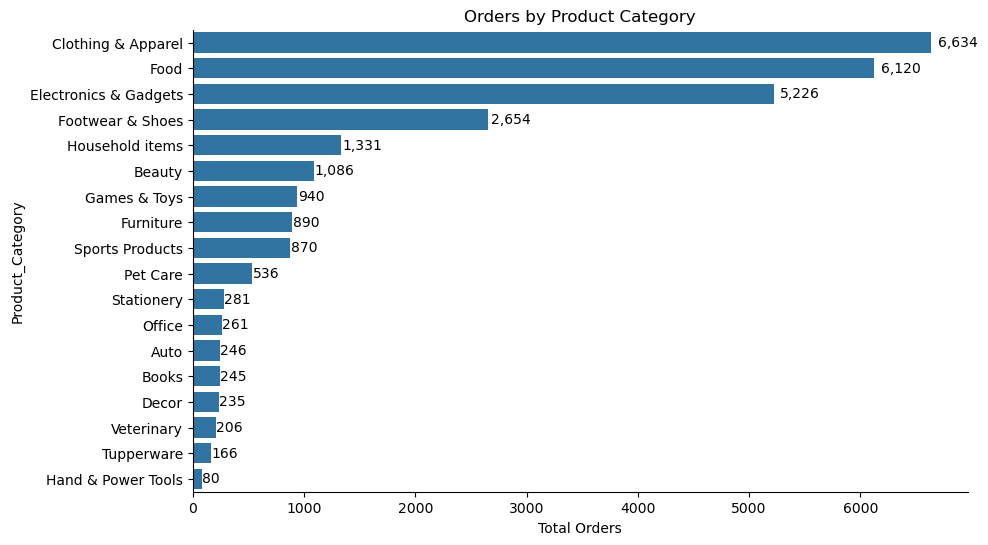

In [67]:
product_orders = dt.groupby('Product_Category')['Orders'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
ax = sns.barplot(data=product_orders, x='Orders', y='Product_Category')
plt.title('Orders by Product Category')
plt.xlabel('Total Orders')
add_values_on_bars(ax, fmt='{:,.0f}')
sns.despine(top=True, right=True) 
plt.show()

## Machine Learning

### Linear Regression to predit the sales amount on the basis of 'Age Group','Marital_Status','Zone', 'Occupation', 'Product_Category', 'Orders'

In [68]:
X = dt[['Gender','Age Group','Marital_Status','Zone', 'Occupation', 'Product_Category', 'Orders']]

In [69]:
y= dt[['Amount']]

In [70]:
X

,Gender,Age Group,Marital_Status,Zone,Occupation,Product_Category,Orders
0,F,26-35,0,Western,Healthcare,Auto,1
1,F,26-35,1,Southern,Govt,Auto,3
2,F,26-35,1,Central,Automobile,Auto,3
3,M,0-17,0,Southern,Construction,Auto,2
4,M,26-35,1,Western,Food Processing,Auto,2
...,...,...,...,...,...,...,...
11246,M,18-25,1,Western,Chemical,Office,4
11247,M,26-35,0,Northern,Healthcare,Veterinary,3
11248,F,36-45,0,Central,Textile,Office,4
11249,M,36-45,0,Southern,Agriculture,Office,3


In [71]:
y

,Amount
0,23952.0
1,23934.0
2,23924.0
3,23912.0
4,23877.0
...,...
11246,370.0
11247,367.0
11248,213.0
11249,206.0


### Train test split

### Converting the categorical values (Gender, Age Group, Marital_Status, State, Zone, Occupation, Product_Category) into numerical, linear regression only works with numerical value

In [72]:
X_encoded = pd.get_dummies(X, columns=['Gender','Age Group','Marital_Status','Zone', 'Occupation', 'Product_Category', 'Orders'])

### Splits data into training (90%) and testing (10%) sets, random_state=42 ensures reproducible results, X_train, y_train will be used to train the model, X_test, y_test will be used to evaluate the model


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded,y, test_size = 0.1, random_state=42)

### Creates a Linear Regression model.

In [98]:
lr_model = LinearRegression()

In [75]:
lr_model

LinearRegression()

### Fits the model to the training data (learns the relationship between X and y).

In [76]:
lr_model.fit(X_train, y_train)

LinearRegression()

### Uses the trained model to predict target values for test data, outputs predicted values for y based on the test features.

In [78]:
y_prediction = lr_model.predict(X_test)

In [79]:
y_prediction

array([[ 7638.25],
       [ 6338.75],
       [ 7711.25],
       ...,
       [ 6470.25],
       [ 9970.25],
       [13739.25]])

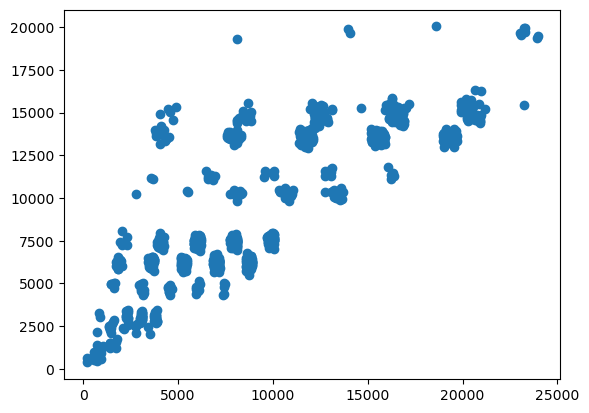

In [82]:
plt.scatter(y_test, y_prediction)
plt.show()

### Calculates Mean Squared Error (MSE) between actual and predicted values.

In [91]:
from sklearn.metrics import mean_squared_error, r2_score

In [103]:
mse1 = mean_squared_error(y_test, y_prediction)

In [107]:
mse1

9357392.946825044

In [108]:
rmse1 = np.sqrt(mse1)

In [109]:
rmse1

3058.985607489032

### Calculates R-squared (R²) score.

In [110]:
r2_score1 = r2_score(y_test, y_prediction)

In [111]:
r2_score1

0.6700461488675988

### Final Result - 67% of variance is explained by the model. 67% accurate